# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:50px;;padding:20px;font-weight:bold">Image Classification <p/> 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
import os

import cv2
import imghdr

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:30px;;padding:10px;font-weight:bold">Loading in the Data <p/> 

    The data was collected from google using the "download all images" extension on google chrome

In [2]:
# Data directory
data_dir = 'data'

# Image types we want to include
image_exts = ['jpeg','jpg', 'bmp', 'png']

# List of files in data directory that we will loop through
os.listdir(data_dir)[0:2]

['dogs', 'cats']

In [3]:
# Remove any weird file types that are not in our image_exts list

for image_class in os.listdir(data_dir)[0:2]:  
    for image in os.listdir(os.path.join(data_dir, image_class)):  
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) 
            tip = imghdr.what(image_path) 
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Found 196 files belonging to 2 classes.


2022-12-11 09:42:48.774444: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


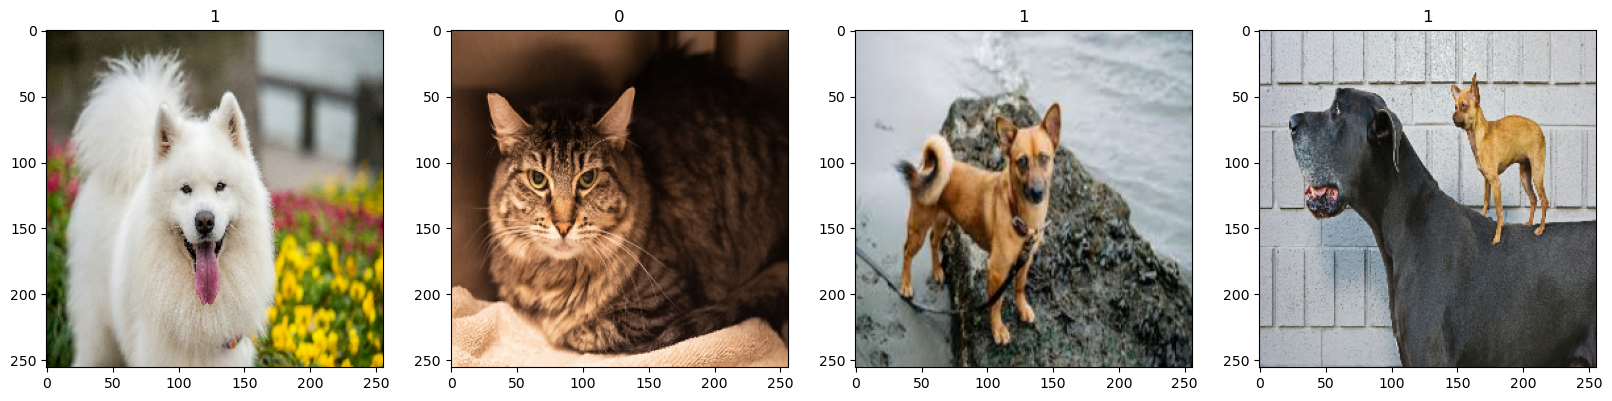

In [4]:
# Generate a dataset from images
data = tf.keras.utils.image_dataset_from_directory('data')

# Create data iterator so we can create batches of data
data_iterator = data.as_numpy_iterator()

# Run this to get a new batch of images
batch = data_iterator.next()
# batch[0]: Images represented as numpy arrays
# batch[1]: Image Labels

# Plot a sample of images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;;padding:10px;font-weight:bold">Creating the Model<p/> 

In [5]:
# Scale the data
data = data.map(lambda x,y: (x/255, y))

In [6]:
len(data)

7

In [12]:
# Split the data into train, val, and test sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
# Neural Network
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [26]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [27]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 19s 4s/step - loss: 1.4813 - accuracy: 0.4219 - val_loss: 0.6731 - val_accuracy: 0.6094
Epoch 2/20
4/4 [==============================] - 22s 4s/step - loss: 0.6754 - accuracy: 0.5781 - val_loss: 0.6776 - val_accuracy: 0.5469
Epoch 3/20
4/4 [==============================] - 24s 5s/step - loss: 0.6293 - accuracy: 0.6094 - val_loss: 0.5533 - val_accuracy: 0.7031
Epoch 4/20
4/4 [==============================] - 23s 5s/step - loss: 0.6241 - accuracy: 0.6328 - val_loss: 0.5531 - val_accuracy: 0.7969
Epoch 5/20
4/4 [==============================] - 24s 5s/step - loss: 0.5858 - accuracy: 0.6797 - val_loss: 0.5070 - val_accuracy: 0.7969
Epoch 6/20


2022-12-11 10:17:30.794790: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 190 of 256
2022-12-11 10:17:31.833277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.


4/4 [==============================] - 30s 5s/step - loss: 0.4864 - accuracy: 0.8359 - val_loss: 0.4617 - val_accuracy: 0.8438
Epoch 7/20
4/4 [==============================] - 27s 5s/step - loss: 0.5059 - accuracy: 0.7109 - val_loss: 0.4049 - val_accuracy: 0.8281
Epoch 8/20


2022-12-11 10:18:28.755871: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:380] Filling up shuffle buffer (this may take a while): 191 of 256
2022-12-11 10:18:28.777702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:405] Shuffle buffer filled.


4/4 [==============================] - 27s 5s/step - loss: 0.3989 - accuracy: 0.8281 - val_loss: 0.3357 - val_accuracy: 0.8906
Epoch 9/20
4/4 [==============================] - 19s 4s/step - loss: 0.3107 - accuracy: 0.8672 - val_loss: 0.3058 - val_accuracy: 0.8438
Epoch 10/20
4/4 [==============================] - 19s 4s/step - loss: 0.3496 - accuracy: 0.8281 - val_loss: 0.2647 - val_accuracy: 0.9375
Epoch 11/20
4/4 [==============================] - 18s 4s/step - loss: 0.3115 - accuracy: 0.8750 - val_loss: 0.3405 - val_accuracy: 0.8281
Epoch 12/20
4/4 [==============================] - 20s 4s/step - loss: 0.3231 - accuracy: 0.8594 - val_loss: 0.2421 - val_accuracy: 0.9375
Epoch 13/20
4/4 [==============================] - 19s 4s/step - loss: 0.2722 - accuracy: 0.9062 - val_loss: 0.2598 - val_accuracy: 0.8438
Epoch 14/20
4/4 [==============================] - 18s 3s/step - loss: 0.1779 - accuracy: 0.9141 - val_loss: 0.2104 - val_accuracy: 0.9062
Epoch 15/20
4/4 [=======================

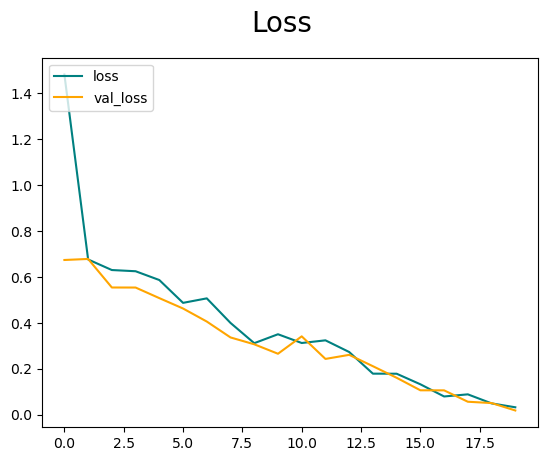

In [28]:
# Plot the loss of the model
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

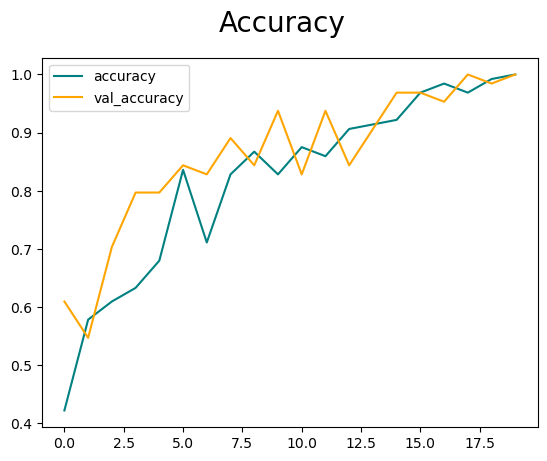

In [30]:
# Plot the accuracy of the model
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;;padding:10px;font-weight:bold">Testing the Model<p/> 

In [32]:
# Evaluation Metrics
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [39]:
# Check the performance of the model on the unseen test set
for batch in test.as_numpy_iterator():
    X,y = batch
    y_pred = model.predict(X)
    precision.update_state(y, y_pred)
    recall.update_state(y, y_pred)
    accuracy.update_state(y,y_pred)

In [40]:
print(f'Precision:{precision.result().numpy()}')
print(f'Recall:{recall.result().numpy()}')
print(f'Accuracy:{accuracy.result().numpy()}')

Precision:1.0
Recall:1.0
Accuracy:1.0


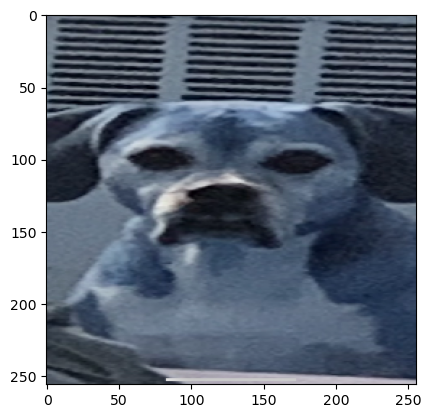

In [52]:
# Load in a new picture of a dog
dog_img = cv2.imread('dog_sample.png')
resized_dog_img = tf.image.resize(dog_img, (256,256))
plt.imshow(resized_dog_img.numpy().astype(int))
plt.show()

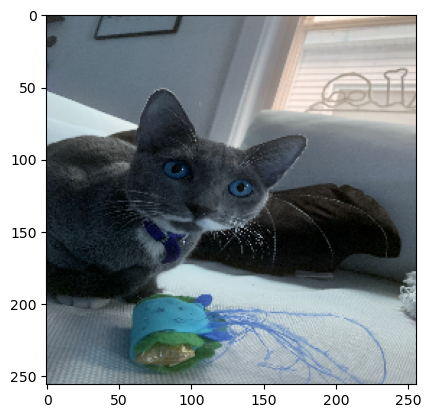

In [51]:
# Load in a new picture of a cat
cat_img = cv2.imread('cat_sample.jpeg')
resized_cat_img = tf.image.resize(cat_img, (256,256))
plt.imshow(resized_cat_img.numpy().astype(int))
plt.show()

In [55]:
# Get the models prediction for the dog sample
y_pred_dog = model.predict(np.expand_dims(resized_dog_img/255,0))
y_pred_dog

array([[0.7556691]], dtype=float32)

In [56]:
# Get the models prediction for the cat sample
y_pred_cat = model.predict(np.expand_dims(resized_cat_img/255,0))
y_pred_cat

array([[0.36224788]], dtype=float32)

# <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:30px;;padding:10px;font-weight:bold">Results<p/>

* The model has 100% for all of our evaluation metrics (precision, recall, and accuracy)
* The model predicted the new sample images correctly

In [58]:
model.save(os.path.join('models', 'catdogmodel.h5'))

In [59]:
new_model = load_model(os.path.join('models', 'catdogmodel.h5'))